# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t90_repeat_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

99.051832  103.563047  108.072082  112.576815  117.079374  121.579759  \
0        848.0       995.0      1265.0      1401.0      1605.0      1572.0   
1        802.0      1078.0      1258.0      1398.0      1564.0      1669.0   
2        901.0      1044.0      1312.0      1431.0      1531.0      1636.0   
3        870.0      1042.0      1274.0      1458.0      1585.0      1732.0   
4        858.0      1030.0      1216.0      1445.0      1572.0      1759.0   
..         ...         ...         ...         ...         ...         ...   
977      498.0       579.0       672.0       724.0       833.0       968.0   
978      488.0       589.0       735.0       805.0       863.0       986.0   
979      490.0       517.0       731.0       768.0       842.0       943.0   
980      430.0       562.0       788.0       722.0       832.0       882.0   
981      471.0       519.0       712.0       825.0       847.0       876.0   

     126.075853  130.567658  135.061538  139.549014  ...  2472.877365  \
0        1819.0      1816.0      2010.0      2186.0  ...       3249.0   
1        1770.0      1934.0      2069.0      2199.0  ...       3418.0   
2        1837.0      1851.0      2149.0      2145.0  ...       3417.0   
3        1902.0      1952.0      2052.0      2197.0  ...       3288.0   
4        1746.0      1883.0      2132.0      2233.0  ...       3421.0   
..          ...         ...         ...         ...  ...          ...   
977       925.0      1016.0      1114.0      1163.0  ...       1358.0   
978       954.0      1055.0      1111.0      1169.0  ...       1436.0   
979       969.0      1001.0      1109.0      1083.0  ...       1400.0   
980       989.0      1008.0      1132.0      1122.0  ...       1470.0   
981       934.0      1016.0      1144.0      1185.0  ...       1441.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
0         3299.0       3319.0       3373.0       3197.0       3194.0   
1         3193.0       3328.0       3254.0       3230.0       3541.0   
2         3289.0       3326.0       3296.0       3264.0       3472.0   
3         3517.0       3387.0       3384.0       3345.0       3365.0   
4         3403.0       3351.0       3490.0       3434.0       3460.0   
..           ...          ...          ...          ...          ...   
977       1313.0       1327.0       1483.0       1286.0       1383.0   
978       1369.0       1360.0       1497.0       1300.0       1418.0   
979       1369.0       1333.0       1398.0       1326.0       1379.0   
980       1362.0       1425.0       1388.0       1339.0       1384.0   
981       1422.0       1325.0       1421.0       1234.0       1378.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
0         3241.0       3231.0       3362.0       3292.0  
1         3320.0       3327.0       3292.0       3361.0  
2         3380.0       3412.0       3405.0       3526.0  
3         3547.0       3406.0       3371.0       3328.0  
4         3497.0       3354.0       3306.0       3388.0  
..           ...          ...          ...          ...  
977       1335.0       1305.0       1372.0       1313.0  
978       1394.0       1260.0       1464.0       1422.0  
979       1458.0       1357.0       1317.0       1444.0  
980       1455.0       1345.0       1368.0       1362.0  
981       1421.0       1273.0       1394.0       1362.0  

[982 rows x 637 columns]

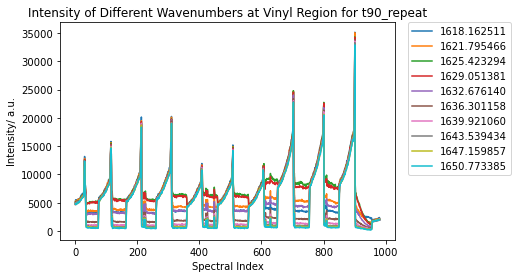

In [4]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t90_repeat')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [5]:
# df.loc[:,'1629.051381'] --> When using loc.
df.columns.get_loc('1629.051381') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.051381'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

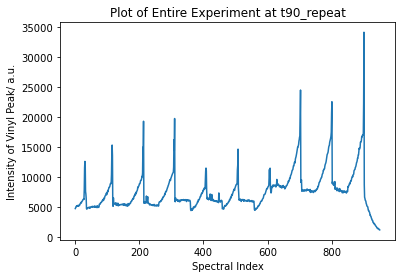

In [7]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:950,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t90_repeat')
plt.show()

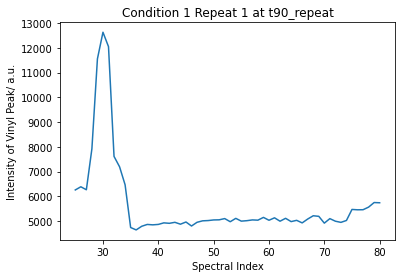

In [10]:
# Condition
df.loc[25:80,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t90_repeat')
plt.show()

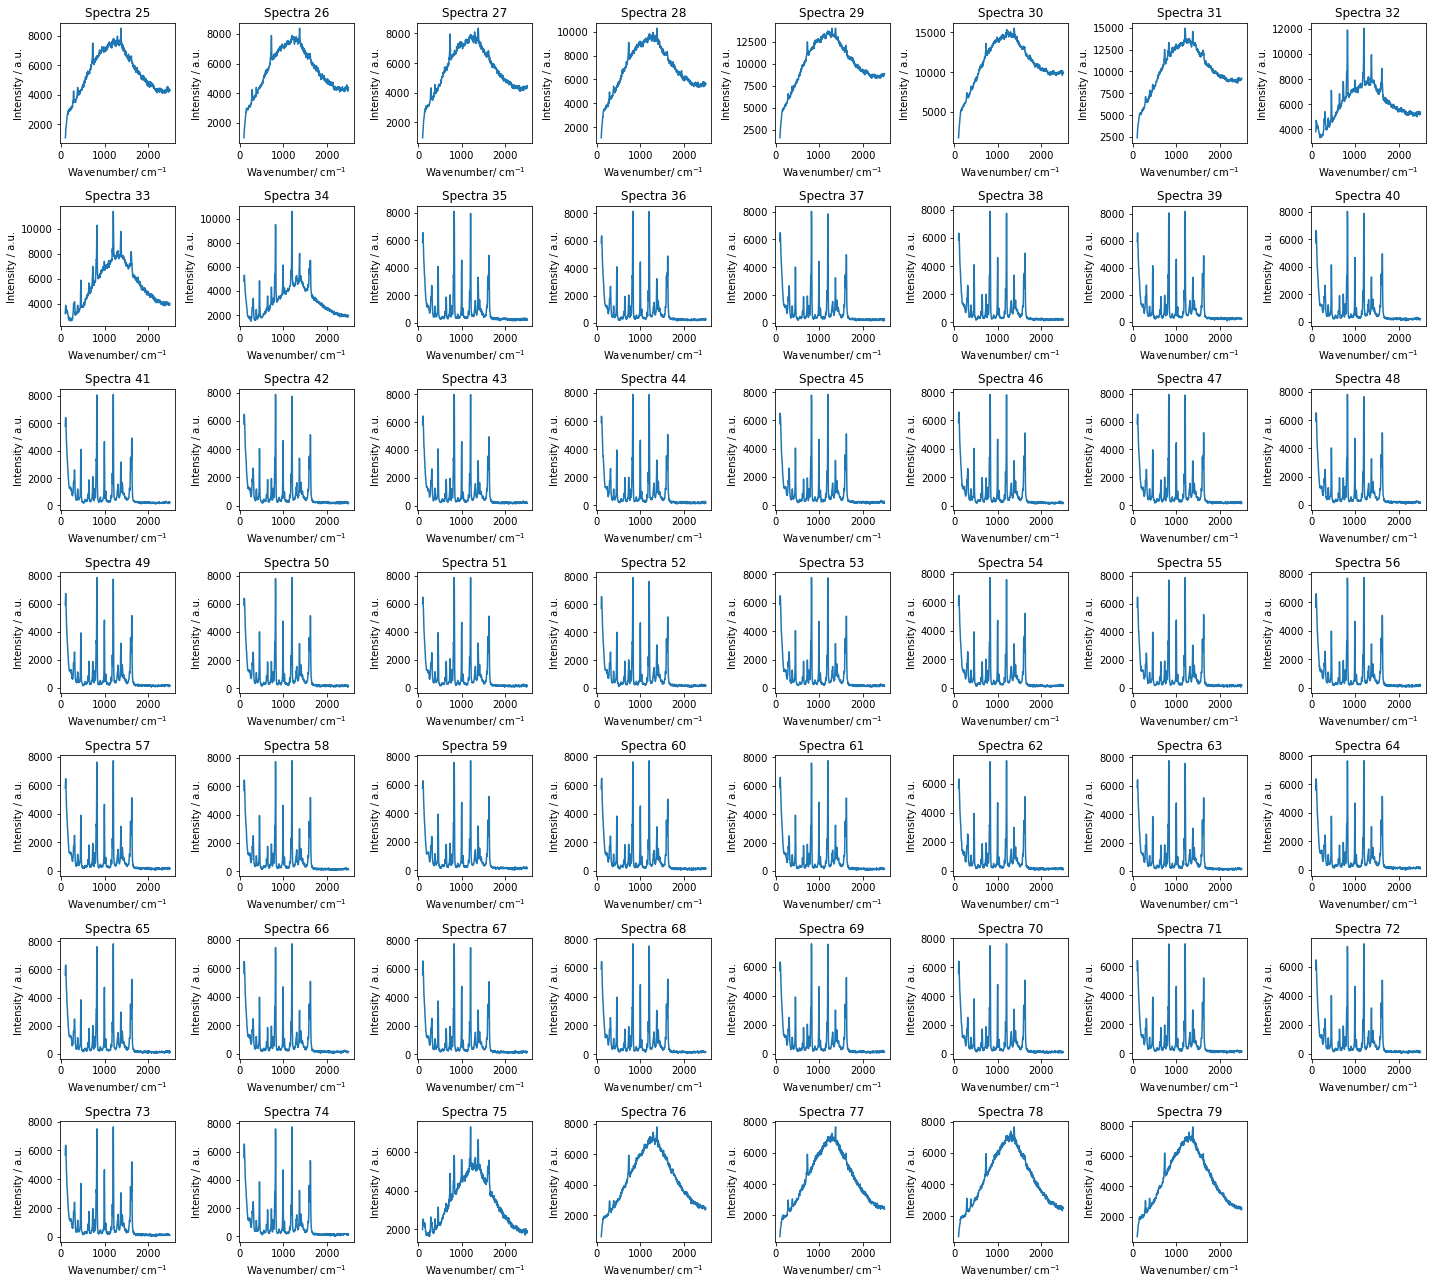

In [11]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(25, 80):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-24))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [12]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[56:70, :]
condition1_ss.insert(loc = 0, column = 'Condition', value = 'C1_R1')
condition1_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
56     C1_R1     5652.0      6287.0      6609.0      6198.0      5625.0   
57     C1_R1     5794.0      6237.0      6446.0      6108.0      5468.0   
58     C1_R1     5706.0      6378.0      6434.0      6184.0      5662.0   
59     C1_R1     5780.0      6258.0      6295.0      6200.0      5488.0   
60     C1_R1     5772.0      6323.0      6501.0      6145.0      5457.0   
61     C1_R1     5859.0      6150.0      6589.0      6078.0      5442.0   
62     C1_R1     5722.0      6237.0      6335.0      5998.0      5594.0   
63     C1_R1     5889.0      6309.0      6416.0      6068.0      5587.0   
64     C1_R1     5608.0      6261.0      6392.0      6052.0      5445.0   
65     C1_R1     5578.0      6193.0      6307.0      5945.0      5451.0   
66     C1_R1     5660.0      6470.0      6390.0      6141.0      5518.0   
67     C1_R1     5570.0      6167.0      6541.0      6217.0      5642.0   
68     C1_R1     5922.0      6384.0      6436.0      6191.0      5551.0   
69     C1_R1     5722.0      6290.0      6313.0      6081.0      5498.0   
70     C1_R1     5572.0      6417.0      6369.0      6148.0      5338.0   

    121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
56      5204.0      4524.0      4190.0      3888.0  ...        181.0   
57      4953.0      4518.0      4199.0      3856.0  ...        230.0   
58      4950.0      4595.0      4069.0      3895.0  ...        105.0   
59      4996.0      4597.0      4145.0      3897.0  ...        194.0   
60      5000.0      4480.0      4154.0      3932.0  ...        169.0   
61      4920.0      4409.0      4266.0      3984.0  ...        168.0   
62      5162.0      4495.0      4144.0      3830.0  ...        194.0   
63      4924.0      4578.0      4253.0      3850.0  ...        107.0   
64      5118.0      4592.0      4235.0      3942.0  ...        162.0   
65      4887.0      4485.0      4315.0      3819.0  ...        156.0   
66      4972.0      4573.0      4063.0      3899.0  ...        134.0   
67      4942.0      4455.0      4087.0      3983.0  ...        117.0   
68      5062.0      4607.0      4175.0      3829.0  ...        160.0   
69      4991.0      4624.0      4150.0      3922.0  ...        211.0   
70      4993.0      4417.0      4231.0      3905.0  ...        149.0   

    2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
56        120.0        131.0        145.0        115.0        218.0   
57        110.0        126.0        206.0        102.0        179.0   
58        142.0        144.0        170.0        142.0        187.0   
59        146.0        131.0        227.0        118.0        202.0   
60        119.0        134.0        210.0         86.0        140.0   
61         98.0         92.0        207.0        127.0        175.0   
62         96.0         82.0        150.0         95.0        110.0   
63        133.0        104.0        160.0         84.0        152.0   
64        146.0        126.0        182.0         92.0        155.0   
65        104.0        114.0        162.0         65.0        157.0   
66         79.0         74.0        150.0         76.0        170.0   
67        123.0        103.0        143.0         82.0        207.0   
68        121.0         94.0        170.0        135.0        144.0   
69        153.0        134.0        163.0        105.0        153.0   
70         73.0        106.0        163.0         90.0        149.0   

    2491.835266  2494.989551  2498.139382  2501.291225  
56        261.0        120.0        150.0        147.0  
57        221.0        121.0        179.0        137.0  
58        197.0        178.0        167.0        128.0  
59        182.0        118.0        167.0        182.0  
60        195.0         98.0        158.0        148.0  
61        175.0        150.0        169.0        164.0  
62        177.0        113.0        126.0         60.0  
63        194.0        118.0        143.0        134.0  

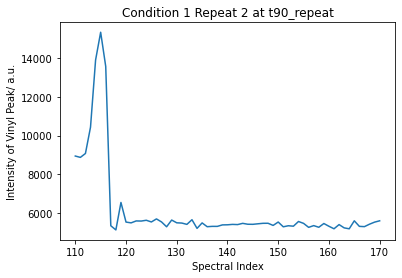

In [14]:
# Condition
df.loc[110:170,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t90_repeat')
plt.show()

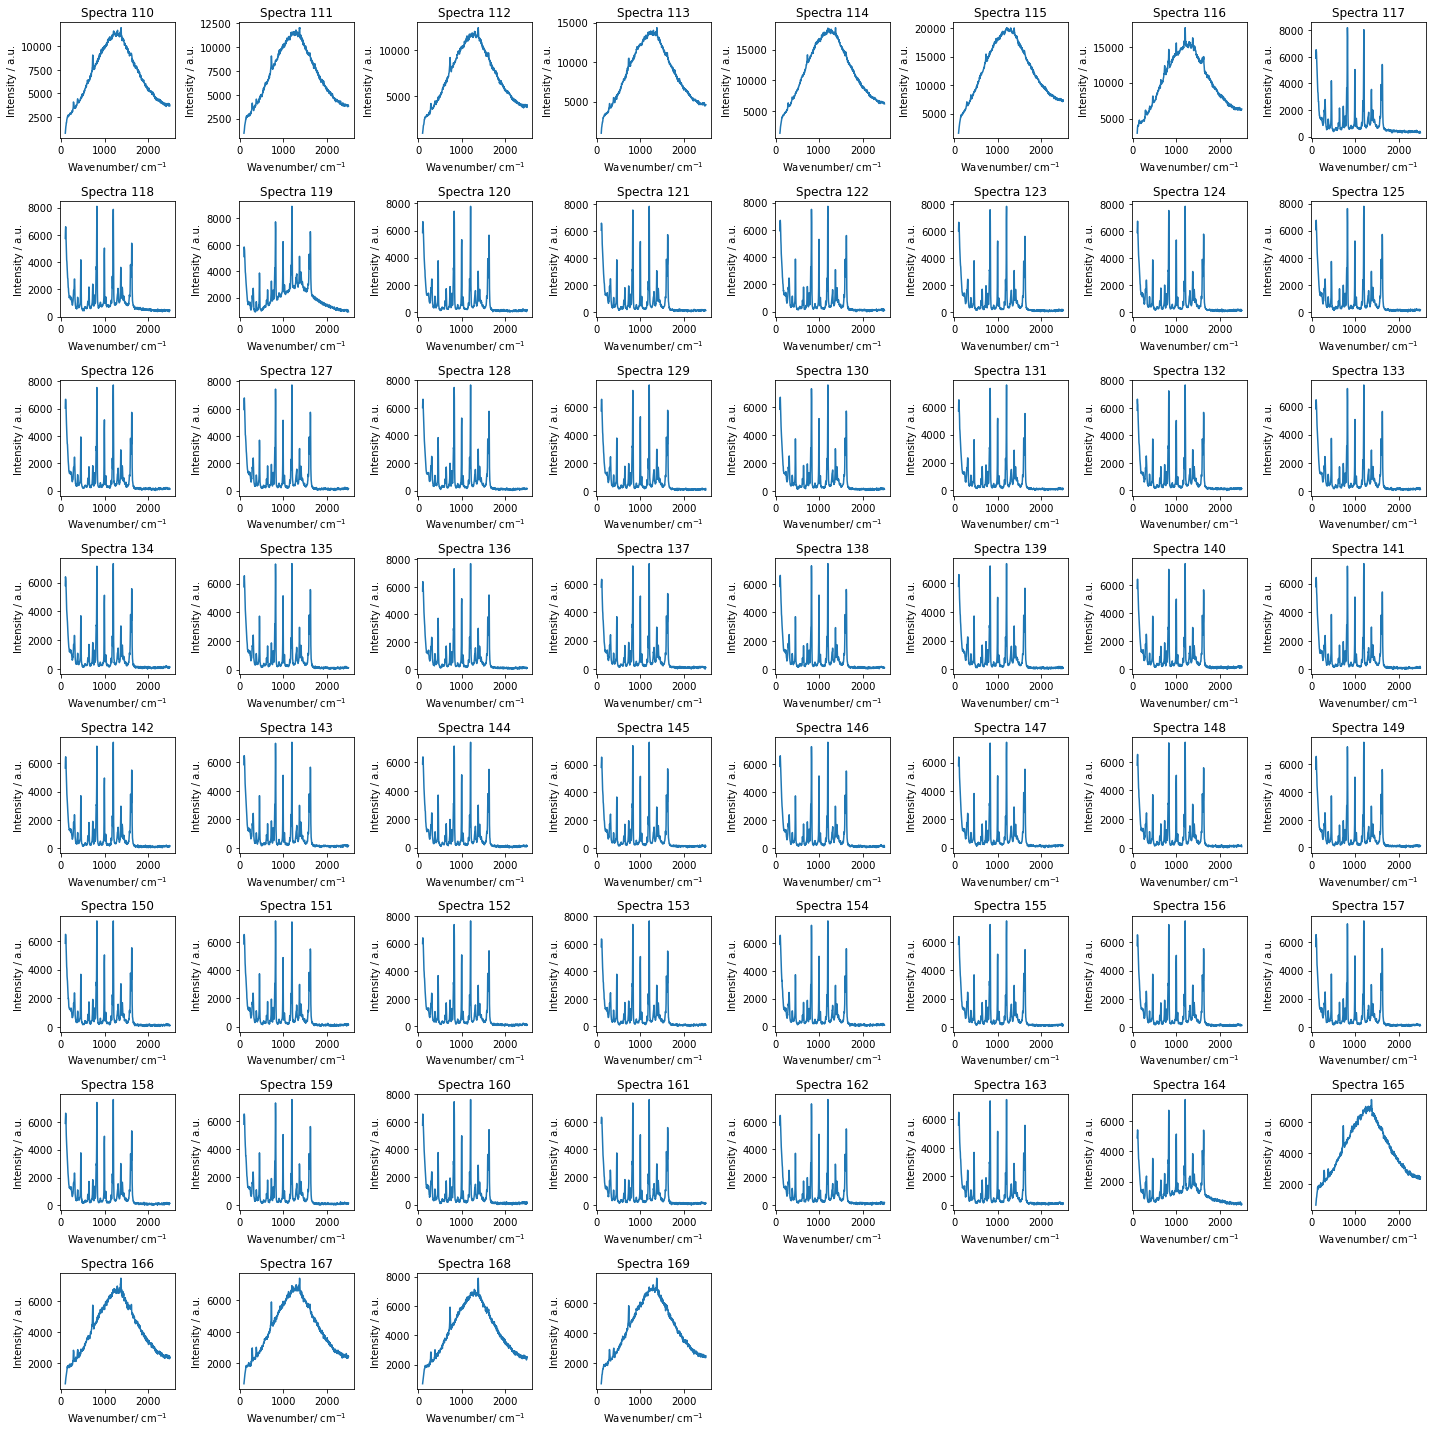

In [15]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(110, 170):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-109))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [16]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[146:160, :]
condition2_ss.insert(loc = 0, column = 'Condition', value = 'C1_R2')
condition2_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
146     C1_R2     5850.0      6492.0      6605.0      6146.0      5638.0   
147     C1_R2     5784.0      6396.0      6306.0      6293.0      5534.0   
148     C1_R2     5767.0      6330.0      6514.0      6161.0      5658.0   
149     C1_R2     5644.0      6413.0      6563.0      6234.0      5469.0   
150     C1_R2     5841.0      6462.0      6451.0      6142.0      5611.0   
151     C1_R2     5852.0      6520.0      6454.0      6150.0      5579.0   
152     C1_R2     6013.0      6420.0      6358.0      6128.0      5547.0   
153     C1_R2     5782.0      6348.0      6335.0      6143.0      5644.0   
154     C1_R2     5908.0      6510.0      6552.0      6066.0      5606.0   
155     C1_R2     5852.0      6368.0      6399.0      6302.0      5523.0   
156     C1_R2     5783.0      6545.0      6517.0      6240.0      5750.0   
157     C1_R2     5715.0      6558.0      6440.0      6257.0      5645.0   
158     C1_R2     5892.0      6373.0      6620.0      6381.0      5518.0   
159     C1_R2     5773.0      6504.0      6485.0      6289.0      5482.0   
160     C1_R2     5754.0      6568.0      6467.0      6126.0      5592.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
146      5119.0      4702.0      4230.0      3966.0  ...        140.0   
147      4999.0      4672.0      4221.0      3971.0  ...        166.0   
148      5001.0      4670.0      4166.0      4044.0  ...        124.0   
149      5146.0      4481.0      4265.0      3978.0  ...        141.0   
150      4964.0      4777.0      4205.0      4035.0  ...        167.0   
151      4973.0      4472.0      4236.0      3822.0  ...        184.0   
152      5166.0      4681.0      4086.0      3902.0  ...        117.0   
153      5012.0      4450.0      4246.0      3996.0  ...        115.0   
154      4969.0      4659.0      4340.0      3899.0  ...        175.0   
155      5007.0      4656.0      4270.0      4038.0  ...        143.0   
156      5263.0      4638.0      4178.0      3952.0  ...        136.0   
157      5165.0      4408.0      4239.0      3922.0  ...        160.0   
158      5055.0      4593.0      4338.0      3985.0  ...        173.0   
159      5019.0      4557.0      4224.0      4004.0  ...        123.0   
160      5112.0      4479.0      4330.0      3922.0  ...        164.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
146        124.0        113.0         96.0         49.0        103.0   
147        133.0         80.0        147.0        106.0        165.0   
148        107.0        121.0        154.0         95.0        147.0   
149         80.0         80.0        160.0         53.0        101.0   
150        101.0        115.0        127.0        106.0        128.0   
151        130.0        123.0        175.0         85.0        175.0   
152        167.0        122.0        164.0         59.0        172.0   
153        109.0        114.0        175.0        100.0        150.0   
154        102.0         92.0        111.0         93.0        158.0   
155        107.0        138.0        175.0         40.0        180.0   
156        141.0        134.0        153.0         83.0        140.0   
157         80.0        107.0        140.0         65.0        139.0   
158        119.0         84.0        193.0         37.0        157.0   
159        100.0         64.0        140.0         70.0        123.0   
160         27.0         88.0         81.0         33.0        107.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
146        196.0         91.0        168.0         85.0  
147        161.0        140.0        168.0        153.0  
148        212.0        139.0        142.0         89.0  
149        143.0        122.0        111.0        119.0  
150        166.0         75.0        121.0         87.0  
151        206.0        126.0        124.0        117.0  
152        157.0         84.0        127.0        115.0  
1

In [19]:
# Condition
df.loc[210:270,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t90_repeat')
plt.show()

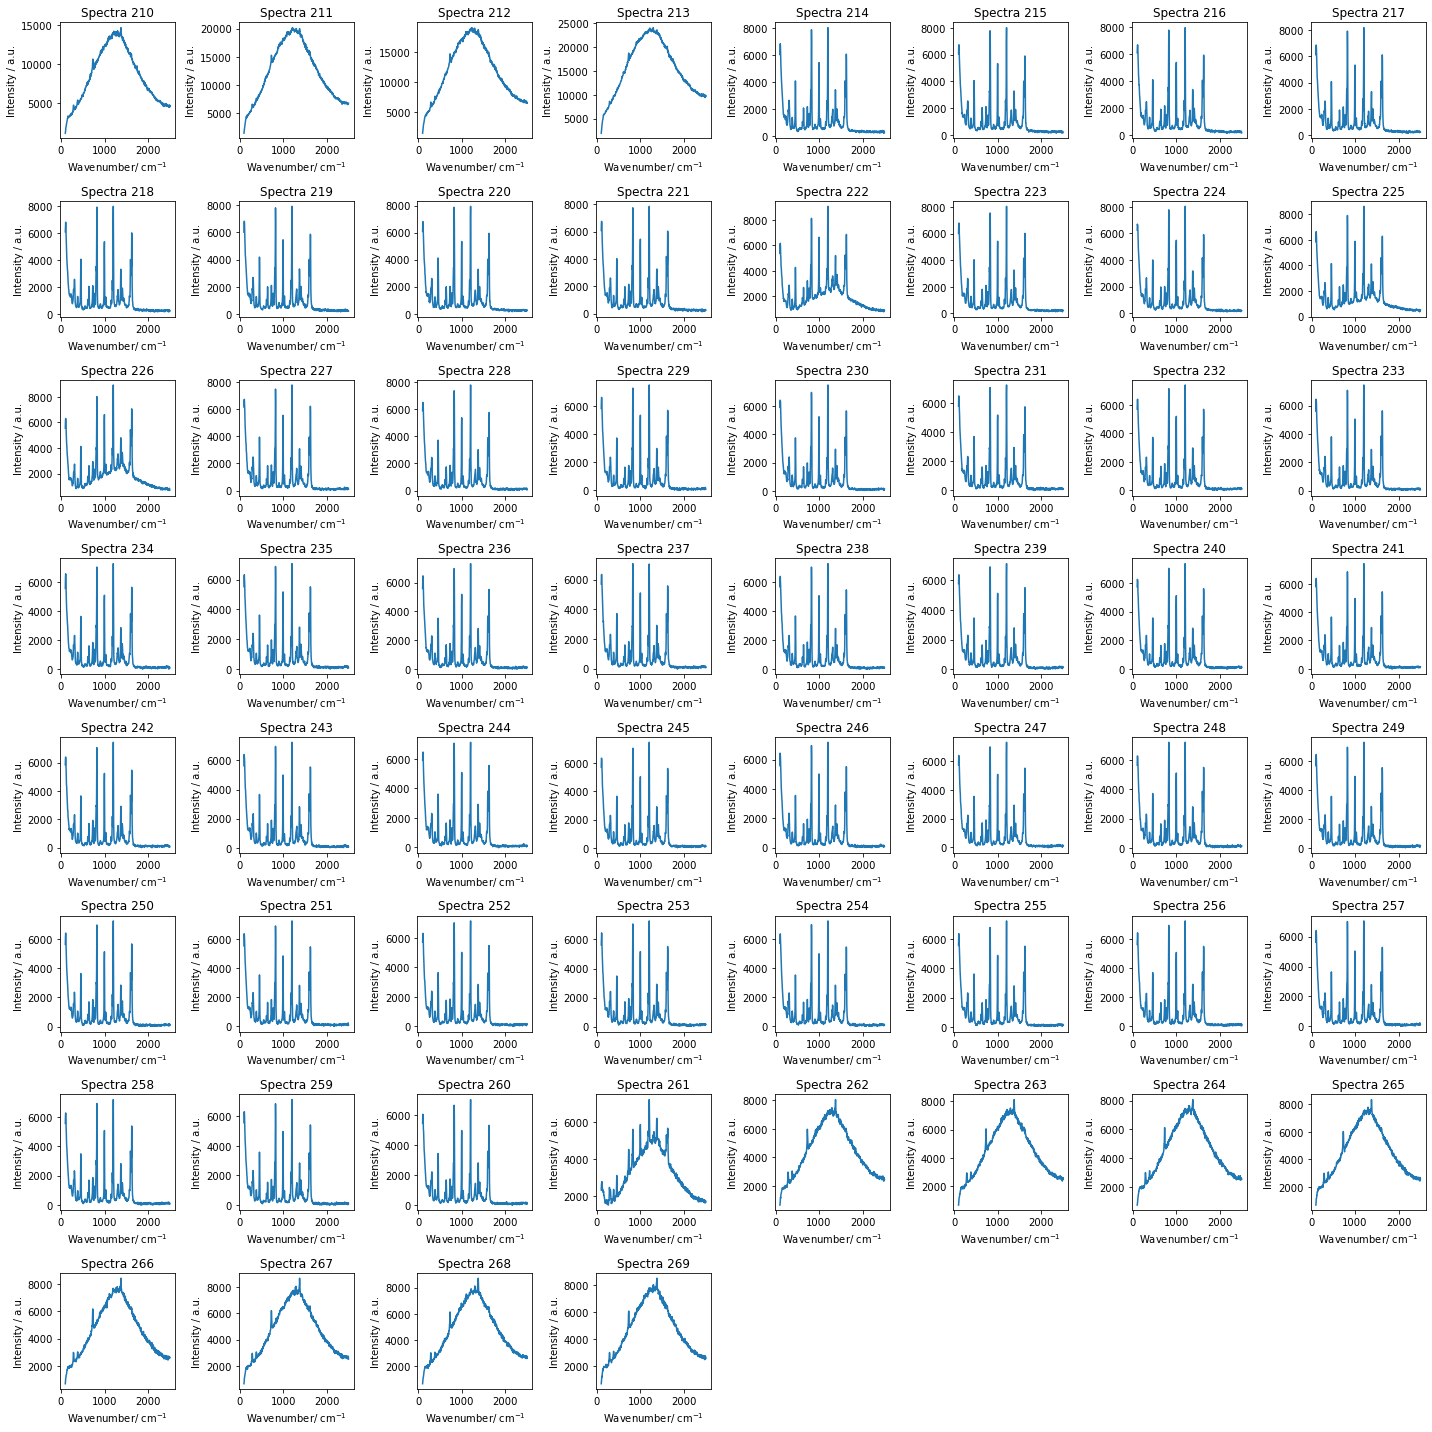

In [20]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(210, 270):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-209))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [21]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[241:255, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
241     C1_R3     5803.0      6192.0      6376.0      6027.0      5501.0   
242     C1_R3     5847.0      6325.0      6389.0      6189.0      5515.0   
243     C1_R3     5627.0      6404.0      6270.0      6107.0      5436.0   
244     C1_R3     5920.0      6239.0      6461.0      6118.0      5374.0   
245     C1_R3     5699.0      6326.0      6321.0      6126.0      5416.0   
246     C1_R3     5586.0      6437.0      6355.0      6079.0      5505.0   
247     C1_R3     5738.0      6387.0      6195.0      5872.0      5564.0   
248     C1_R3     5644.0      6274.0      6266.0      6020.0      5533.0   
249     C1_R3     5711.0      6358.0      6481.0      6050.0      5513.0   
250     C1_R3     5646.0      6190.0      6419.0      5924.0      5428.0   
251     C1_R3     5548.0      6388.0      6317.0      6041.0      5421.0   
252     C1_R3     5736.0      6149.0      6323.0      6106.0      5389.0   
253     C1_R3     5626.0      6155.0      6454.0      5859.0      5483.0   
254     C1_R3     5712.0      6152.0      6354.0      5929.0      5383.0   
255     C1_R3     5571.0      6381.0      6291.0      5849.0      5299.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
241      5014.0      4532.0      4122.0      3884.0  ...        118.0   
242      4958.0      4443.0      4296.0      3827.0  ...        108.0   
243      4977.0      4475.0      4078.0      3985.0  ...         95.0   
244      5046.0      4556.0      4266.0      3968.0  ...        117.0   
245      5162.0      4410.0      4173.0      3808.0  ...        149.0   
246      4908.0      4473.0      4096.0      3808.0  ...        131.0   
247      4956.0      4524.0      4190.0      3879.0  ...         99.0   
248      4984.0      4703.0      3968.0      3792.0  ...        199.0   
249      4897.0      4540.0      4327.0      3872.0  ...        120.0   
250      4911.0      4502.0      4053.0      3810.0  ...        153.0   
251      4935.0      4532.0      4233.0      4013.0  ...        159.0   
252      4900.0      4588.0      4079.0      3787.0  ...        119.0   
253      4976.0      4462.0      4226.0      3757.0  ...        132.0   
254      4995.0      4504.0      4133.0      3825.0  ...        130.0   
255      4908.0      4442.0      4044.0      3762.0  ...        117.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
241         77.0         83.0        136.0         85.0        161.0   
242        120.0         63.0         81.0         48.0        125.0   
243         71.0        108.0        115.0         44.0        131.0   
244         86.0         99.0        109.0         37.0        144.0   
245         55.0         83.0        161.0         89.0        106.0   
246         59.0        118.0        155.0         24.0        156.0   
247         98.0         40.0        142.0         34.0        160.0   
248         68.0         65.0        108.0         63.0        126.0   
249         66.0        103.0        150.0         25.0        177.0   
250         74.0         91.0        156.0         46.0        172.0   
251         71.0         76.0        156.0         39.0        132.0   
252         52.0         99.0        154.0         28.0        119.0   
253        123.0        112.0        180.0         78.0        161.0   
254        100.0         91.0        134.0         41.0        134.0   
255         79.0         52.0        146.0         64.0        138.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
241        151.0        105.0         78.0        117.0  
242        136.0        118.0        114.0         59.0  
243        121.0         73.0        119.0         79.0  
244        165.0        106.0        106.0         70.0  
245        178.0        106.0        141.0         98.0  
246         92.0        101.0         90.0         93.0  
247         99.0        128.0         99.0        140.0  
2

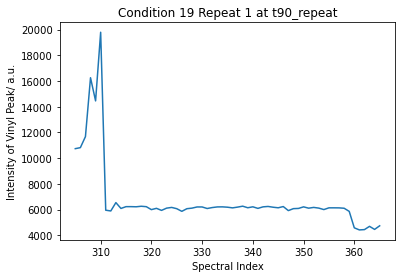

In [23]:
# Condition
df.loc[305:365,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t90_repeat')
plt.show()

In [24]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(305, 365):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-304))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [25]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[341:355, :]
condition4_ss.insert(loc = 0, column = 'Condition', value ='C19_R1')
condition4_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
341    C19_R1     6092.0      6726.0      6884.0      6243.0      5878.0   
342    C19_R1     6200.0      6720.0      6780.0      6540.0      5842.0   
343    C19_R1     6170.0      6671.0      6697.0      6467.0      5983.0   
344    C19_R1     6121.0      6730.0      6876.0      6436.0      6009.0   
345    C19_R1     6210.0      6738.0      6917.0      6470.0      5896.0   
346    C19_R1     6048.0      6724.0      6834.0      6412.0      5945.0   
347    C19_R1     6111.0      6724.0      6630.0      6434.0      5748.0   
348    C19_R1     6133.0      6627.0      6731.0      6379.0      5716.0   
349    C19_R1     6097.0      6796.0      6698.0      6368.0      5957.0   
350    C19_R1     5936.0      6472.0      6748.0      6521.0      6009.0   
351    C19_R1     6207.0      6615.0      6810.0      6450.0      5856.0   
352    C19_R1     6127.0      6590.0      6749.0      6318.0      6002.0   
353    C19_R1     6136.0      6700.0      6870.0      6435.0      5922.0   
354    C19_R1     6043.0      6627.0      6593.0      6441.0      5898.0   
355    C19_R1     6291.0      6469.0      6755.0      6568.0      5778.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
341      5271.0      4819.0      4392.0      4178.0  ...        108.0   
342      5237.0      4842.0      4478.0      4118.0  ...        180.0   
343      5331.0      4792.0      4396.0      4216.0  ...        132.0   
344      5301.0      4827.0      4348.0      4134.0  ...        133.0   
345      5326.0      4974.0      4445.0      4185.0  ...        109.0   
346      5266.0      4860.0      4344.0      4061.0  ...        131.0   
347      5470.0      4811.0      4301.0      4146.0  ...        127.0   
348      5218.0      4781.0      4534.0      4063.0  ...        150.0   
349      5358.0      4825.0      4502.0      4032.0  ...         88.0   
350      5438.0      4750.0      4345.0      4195.0  ...        155.0   
351      5348.0      4761.0      4371.0      3941.0  ...        166.0   
352      5286.0      4801.0      4500.0      4070.0  ...        141.0   
353      5273.0      4882.0      4324.0      4088.0  ...        137.0   
354      5355.0      4794.0      4494.0      4093.0  ...        153.0   
355      5342.0      4919.0      4352.0      4249.0  ...        129.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
341         61.0        116.0        162.0         78.0        148.0   
342        103.0        116.0        168.0         63.0        124.0   
343         98.0         80.0        150.0         75.0        159.0   
344         79.0        106.0        148.0         72.0        145.0   
345        114.0         60.0        197.0         81.0        164.0   
346        133.0         88.0        209.0         89.0        126.0   
347         69.0         47.0        132.0         73.0        135.0   
348         84.0         73.0         77.0         52.0        121.0   
349         71.0        120.0        120.0         29.0        152.0   
350         89.0        162.0        129.0         65.0        104.0   
351         54.0        104.0        119.0         94.0        125.0   
352        132.0        127.0        170.0        111.0        199.0   
353         79.0        123.0        119.0        105.0        139.0   
354        160.0        104.0        151.0        131.0        185.0   
355        114.0         74.0        200.0        106.0        196.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
341        177.0        122.0        175.0         93.0  
342        174.0        142.0        112.0         92.0  
343        153.0         80.0        149.0        114.0  
344        201.0        123.0        122.0         60.0  
345        149.0         95.0        125.0        182.0  
346        180.0        120.0        148.0        115.0  
347        210.0        104.0        138.0        110.0  
3

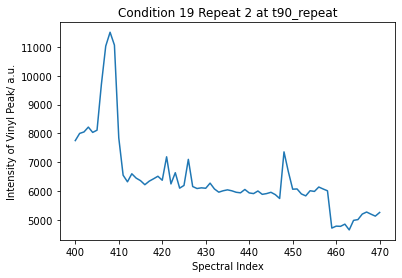

In [27]:
# Condition
df.loc[400:470,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t90_repeat')
plt.show()

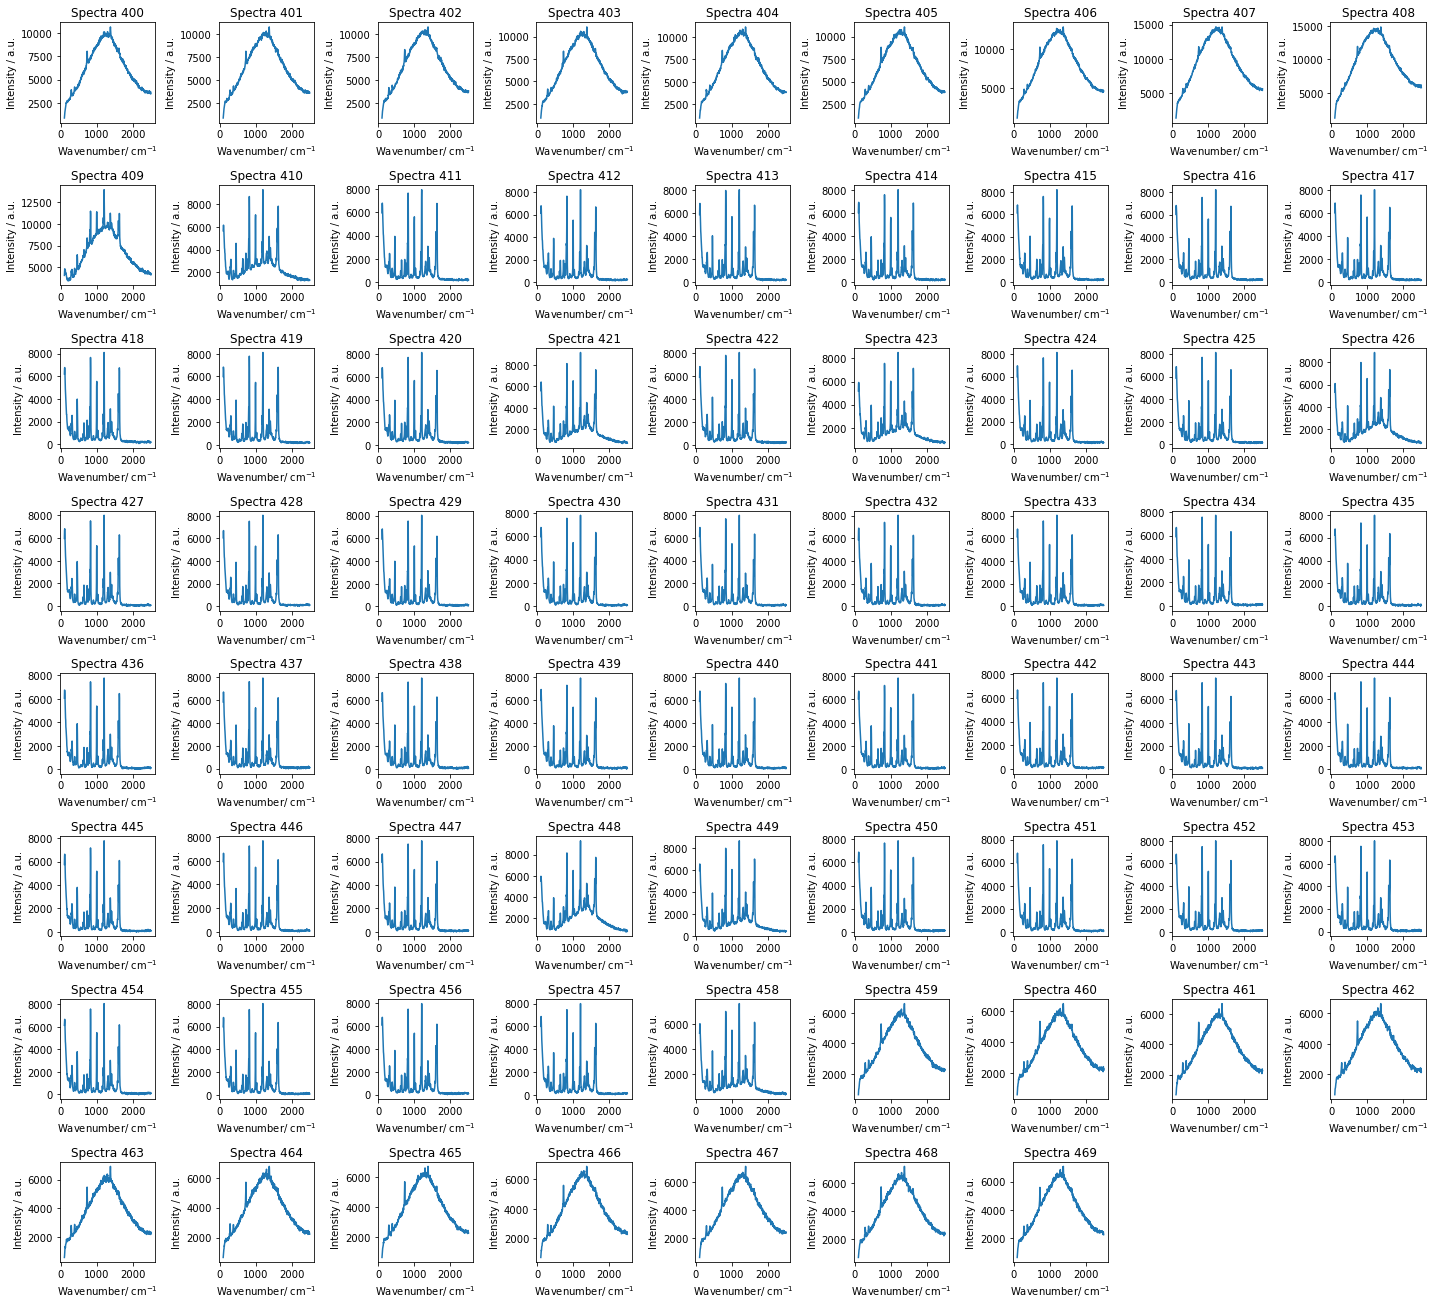

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(400, 470):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(9,9,(i-399))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[433:447, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
433    C19_R2     6133.0      6644.0      6810.0      6410.0      6059.0   
434    C19_R2     5904.0      6619.0      6684.0      6638.0      5710.0   
435    C19_R2     6236.0      6553.0      6756.0      6159.0      5817.0   
436    C19_R2     6049.0      6733.0      6720.0      6422.0      5839.0   
437    C19_R2     5842.0      6603.0      6713.0      6502.0      5738.0   
438    C19_R2     5897.0      6408.0      6649.0      6414.0      5763.0   
439    C19_R2     5962.0      6651.0      6900.0      6301.0      5712.0   
440    C19_R2     5876.0      6568.0      6762.0      6525.0      5755.0   
441    C19_R2     6054.0      6568.0      6713.0      6472.0      5755.0   
442    C19_R2     5963.0      6404.0      6665.0      6426.0      5715.0   
443    C19_R2     5926.0      6552.0      6772.0      6252.0      5733.0   
444    C19_R2     6014.0      6530.0      6532.0      6281.0      5852.0   
445    C19_R2     5750.0      6429.0      6623.0      6297.0      5800.0   
446    C19_R2     5934.0      6410.0      6632.0      6373.0      5715.0   
447    C19_R2     5948.0      6560.0      6650.0      6108.0      5550.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
433      5260.0      4750.0      4334.0      4071.0  ...         71.0   
434      5334.0      4743.0      4205.0      4143.0  ...        112.0   
435      5332.0      4810.0      4302.0      4116.0  ...        138.0   
436      5309.0      4816.0      4370.0      4195.0  ...        143.0   
437      5229.0      4735.0      4370.0      4201.0  ...        193.0   
438      5295.0      4662.0      4332.0      3910.0  ...        147.0   
439      5313.0      4850.0      4542.0      4174.0  ...        132.0   
440      5163.0      4730.0      4294.0      4089.0  ...        138.0   
441      5266.0      4616.0      4341.0      4195.0  ...        168.0   
442      5182.0      4732.0      4236.0      4024.0  ...        121.0   
443      5257.0      4843.0      4365.0      3975.0  ...        144.0   
444      5195.0      4524.0      4301.0      4034.0  ...        134.0   
445      5107.0      4649.0      4311.0      3973.0  ...        161.0   
446      5117.0      4701.0      4251.0      3837.0  ...        138.0   
447      5121.0      4737.0      4167.0      3828.0  ...         97.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
433        114.0         75.0        119.0         78.0        156.0   
434         79.0         98.0        140.0         50.0        112.0   
435        142.0         32.0        161.0         27.0        163.0   
436        130.0        153.0        186.0         49.0        179.0   
437         33.0        109.0        108.0         58.0         99.0   
438         95.0         96.0        108.0         19.0        194.0   
439         79.0         31.0        140.0         69.0        175.0   
440         89.0        104.0        129.0         66.0        115.0   
441        109.0        136.0        205.0         46.0        171.0   
442        100.0         53.0        130.0         37.0        141.0   
443         83.0         69.0        164.0         52.0         67.0   
444         78.0         87.0        123.0         31.0        113.0   
445         85.0        101.0        124.0         54.0        149.0   
446         91.0         87.0        133.0        100.0        119.0   
447         90.0        116.0        174.0         62.0        144.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
433        100.0         89.0        104.0         73.0  
434        199.0         96.0        171.0        119.0  
435        127.0        178.0        100.0         88.0  
436        143.0        108.0        141.0        128.0  
437        178.0         48.0        116.0         95.0  
438        149.0        122.0        150.0         64.0  
439        197.0        144.0        132.0         82.0  
4

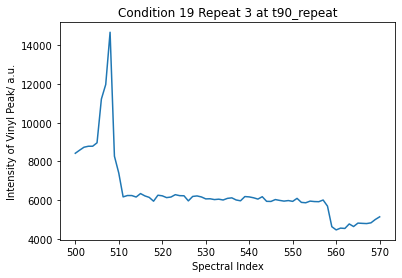

In [31]:
# Condition
df.loc[500:570,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t90_repeat')
plt.show()

In [32]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(500, 570):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(9,9,(i-499))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [33]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[541:555, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
541    C19_R3     6035.0      6672.0      6658.0      6524.0      5943.0   
542    C19_R3     5935.0      6732.0      6933.0      6391.0      5848.0   
543    C19_R3     5988.0      6660.0      6750.0      6427.0      6005.0   
544    C19_R3     5936.0      6586.0      6765.0      6264.0      5974.0   
545    C19_R3     6084.0      6778.0      6879.0      6392.0      5806.0   
546    C19_R3     5990.0      6603.0      6851.0      6447.0      5970.0   
547    C19_R3     6072.0      6712.0      6735.0      6413.0      5878.0   
548    C19_R3     5838.0      6725.0      6757.0      6620.0      5705.0   
549    C19_R3     5963.0      6666.0      6651.0      6548.0      6021.0   
550    C19_R3     6022.0      6676.0      6684.0      6410.0      5824.0   
551    C19_R3     6133.0      6738.0      6851.0      6416.0      5874.0   
552    C19_R3     6059.0      6651.0      6615.0      6378.0      5961.0   
553    C19_R3     6234.0      6639.0      6701.0      6278.0      5881.0   
554    C19_R3     6172.0      6558.0      6833.0      6425.0      5867.0   
555    C19_R3     6042.0      6738.0      6761.0      6413.0      5867.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
541      5336.0      4739.0      4241.0      4135.0  ...        124.0   
542      5384.0      4867.0      4462.0      4135.0  ...        152.0   
543      5398.0      5010.0      4500.0      4056.0  ...        133.0   
544      5258.0      4798.0      4382.0      4123.0  ...        141.0   
545      5350.0      4881.0      4497.0      4033.0  ...        120.0   
546      5263.0      4784.0      4421.0      4191.0  ...        152.0   
547      5193.0      4770.0      4348.0      4141.0  ...        162.0   
548      5296.0      4698.0      4319.0      4036.0  ...        165.0   
549      5428.0      4802.0      4319.0      3882.0  ...        153.0   
550      5384.0      4932.0      4384.0      4117.0  ...        115.0   
551      5226.0      4778.0      4334.0      4041.0  ...         75.0   
552      5365.0      4826.0      4459.0      4092.0  ...        162.0   
553      5330.0      4823.0      4373.0      4065.0  ...        121.0   
554      5247.0      4868.0      4477.0      4194.0  ...        168.0   
555      5210.0      4847.0      4277.0      4089.0  ...         99.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
541         62.0         98.0        179.0         74.0        149.0   
542        174.0         86.0        166.0         66.0        165.0   
543        103.0        109.0        197.0         56.0        193.0   
544        176.0        102.0        175.0        102.0        138.0   
545         89.0        108.0        185.0         75.0        175.0   
546         75.0        119.0        179.0         50.0        189.0   
547        151.0        108.0        139.0        108.0        207.0   
548         88.0         80.0        197.0         78.0        123.0   
549         63.0         95.0        122.0         59.0        146.0   
550        113.0         95.0        118.0         69.0        166.0   
551         71.0         48.0        161.0         34.0        135.0   
552         61.0         84.0        144.0         51.0        116.0   
553        144.0        106.0        139.0         33.0        129.0   
554         80.0        116.0        124.0         87.0        131.0   
555         62.0         91.0        132.0         48.0        160.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
541        151.0         86.0        146.0        104.0  
542        175.0        142.0        133.0         88.0  
543        109.0        158.0        104.0        150.0  
544        165.0        100.0        131.0        132.0  
545        122.0        140.0         58.0         86.0  
546        183.0        158.0        157.0        100.0  
547        150.0        120.0        138.0        174.0  
5

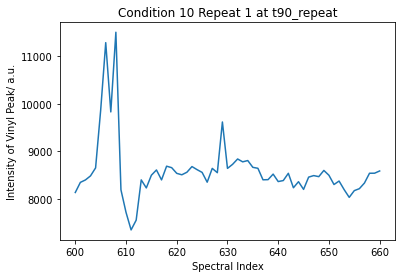

In [39]:
# Condition
df.loc[600:660,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t90_repeat')
plt.show()

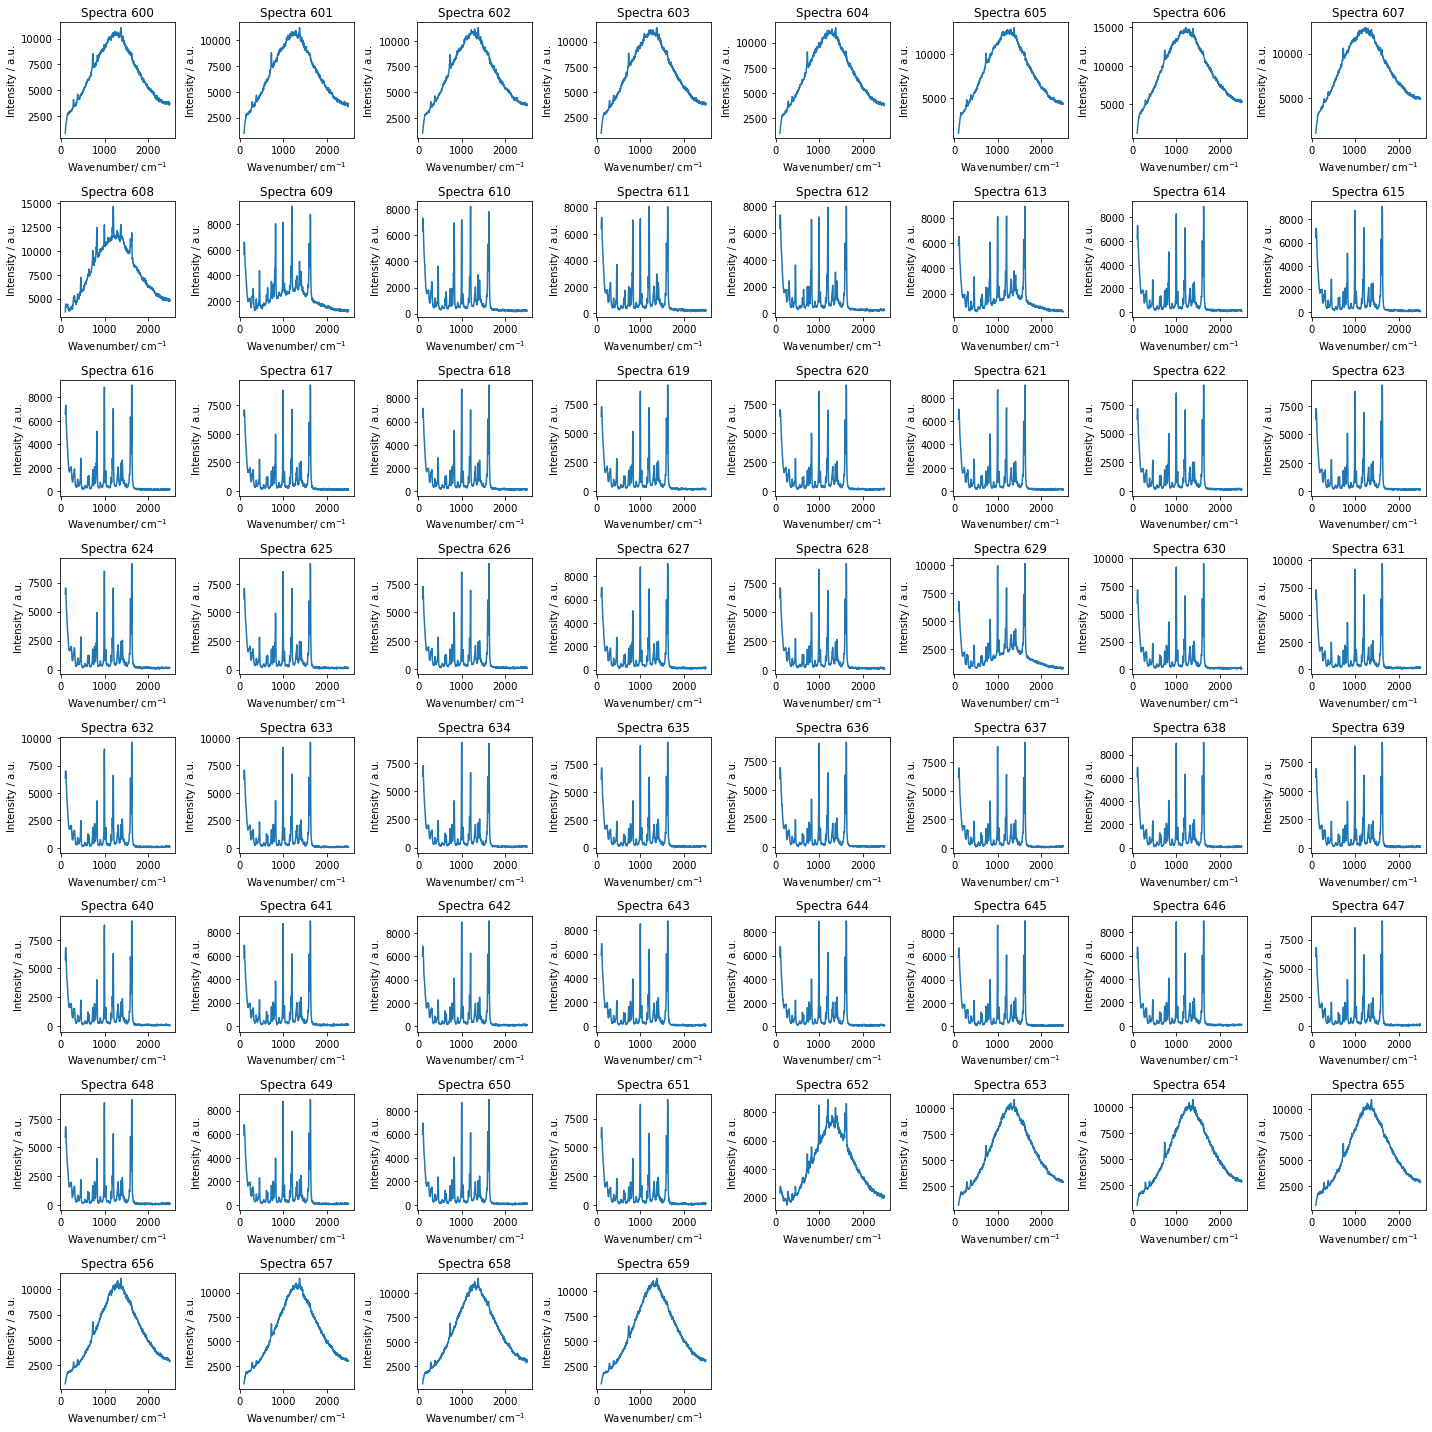

In [38]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(600, 660):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-599))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [40]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[636:650, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
636    C10_R1     6002.0      6722.0      6939.0      6534.0      6169.0   
637    C10_R1     6175.0      6977.0      6994.0      6787.0      6180.0   
638    C10_R1     6124.0      6852.0      6906.0      6626.0      6171.0   
639    C10_R1     6190.0      6848.0      6961.0      6558.0      6091.0   
640    C10_R1     5773.0      6546.0      6821.0      6543.0      6081.0   
641    C10_R1     5836.0      6883.0      6916.0      6677.0      5955.0   
642    C10_R1     6044.0      6698.0      6866.0      6519.0      6103.0   
643    C10_R1     5974.0      6595.0      6880.0      6453.0      5997.0   
644    C10_R1     5887.0      6637.0      6772.0      6536.0      5991.0   
645    C10_R1     5906.0      6688.0      6714.0      6468.0      5872.0   
646    C10_R1     5804.0      6677.0      6712.0      6529.0      6013.0   
647    C10_R1     6040.0      6534.0      6828.0      6655.0      6059.0   
648    C10_R1     5890.0      6679.0      6814.0      6496.0      5958.0   
649    C10_R1     5898.0      6743.0      6800.0      6500.0      6087.0   
650    C10_R1     6008.0      6643.0      6950.0      6529.0      5892.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
636      5709.0      5089.0      4771.0      4433.0  ...        136.0   
637      5743.0      5160.0      4598.0      4490.0  ...        143.0   
638      5475.0      5004.0      4550.0      4395.0  ...         75.0   
639      5496.0      5001.0      4685.0      4318.0  ...        157.0   
640      5552.0      4986.0      4431.0      4205.0  ...        105.0   
641      5449.0      5150.0      4676.0      4249.0  ...        112.0   
642      5540.0      5012.0      4453.0      4231.0  ...        186.0   
643      5329.0      4829.0      4509.0      4251.0  ...        138.0   
644      5473.0      5055.0      4591.0      4277.0  ...        156.0   
645      5402.0      4918.0      4688.0      4251.0  ...        101.0   
646      5396.0      5004.0      4645.0      4332.0  ...         96.0   
647      5464.0      5050.0      4524.0      4353.0  ...        138.0   
648      5432.0      5004.0      4488.0      4229.0  ...         93.0   
649      5591.0      5058.0      4676.0      4295.0  ...        117.0   
650      5388.0      5098.0      4491.0      4247.0  ...        160.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
636         77.0         40.0        118.0         11.0        156.0   
637         49.0        105.0        127.0         42.0        154.0   
638         86.0         61.0        118.0         13.0        130.0   
639         91.0         97.0        112.0         87.0        108.0   
640         60.0         56.0        101.0         39.0        128.0   
641         89.0         72.0        150.0         36.0         65.0   
642         85.0         57.0         96.0         64.0        140.0   
643         91.0         74.0        176.0          2.0        177.0   
644        110.0         69.0        157.0        105.0        149.0   
645         44.0         37.0        135.0         -4.0        101.0   
646         86.0        120.0        130.0         50.0         90.0   
647        129.0         54.0        134.0         41.0        116.0   
648         52.0         57.0         65.0         37.0        104.0   
649         56.0         62.0        102.0         35.0         96.0   
650         75.0         73.0        138.0         80.0        171.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
636         84.0        128.0         61.0         60.0  
637        183.0         80.0        102.0        167.0  
638        134.0        104.0        102.0        111.0  
639        136.0        113.0        138.0         69.0  
640        127.0         47.0        101.0         25.0  
641        131.0         88.0        101.0         59.0  
642        134.0         79.0        108.0        131.0  
6

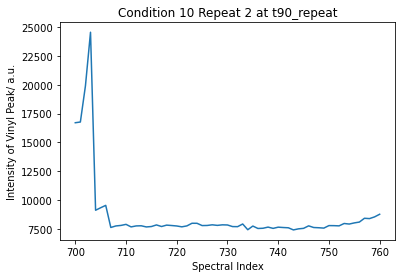

In [43]:
# Condition
df.loc[700:760,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t90_repeat')
plt.show()

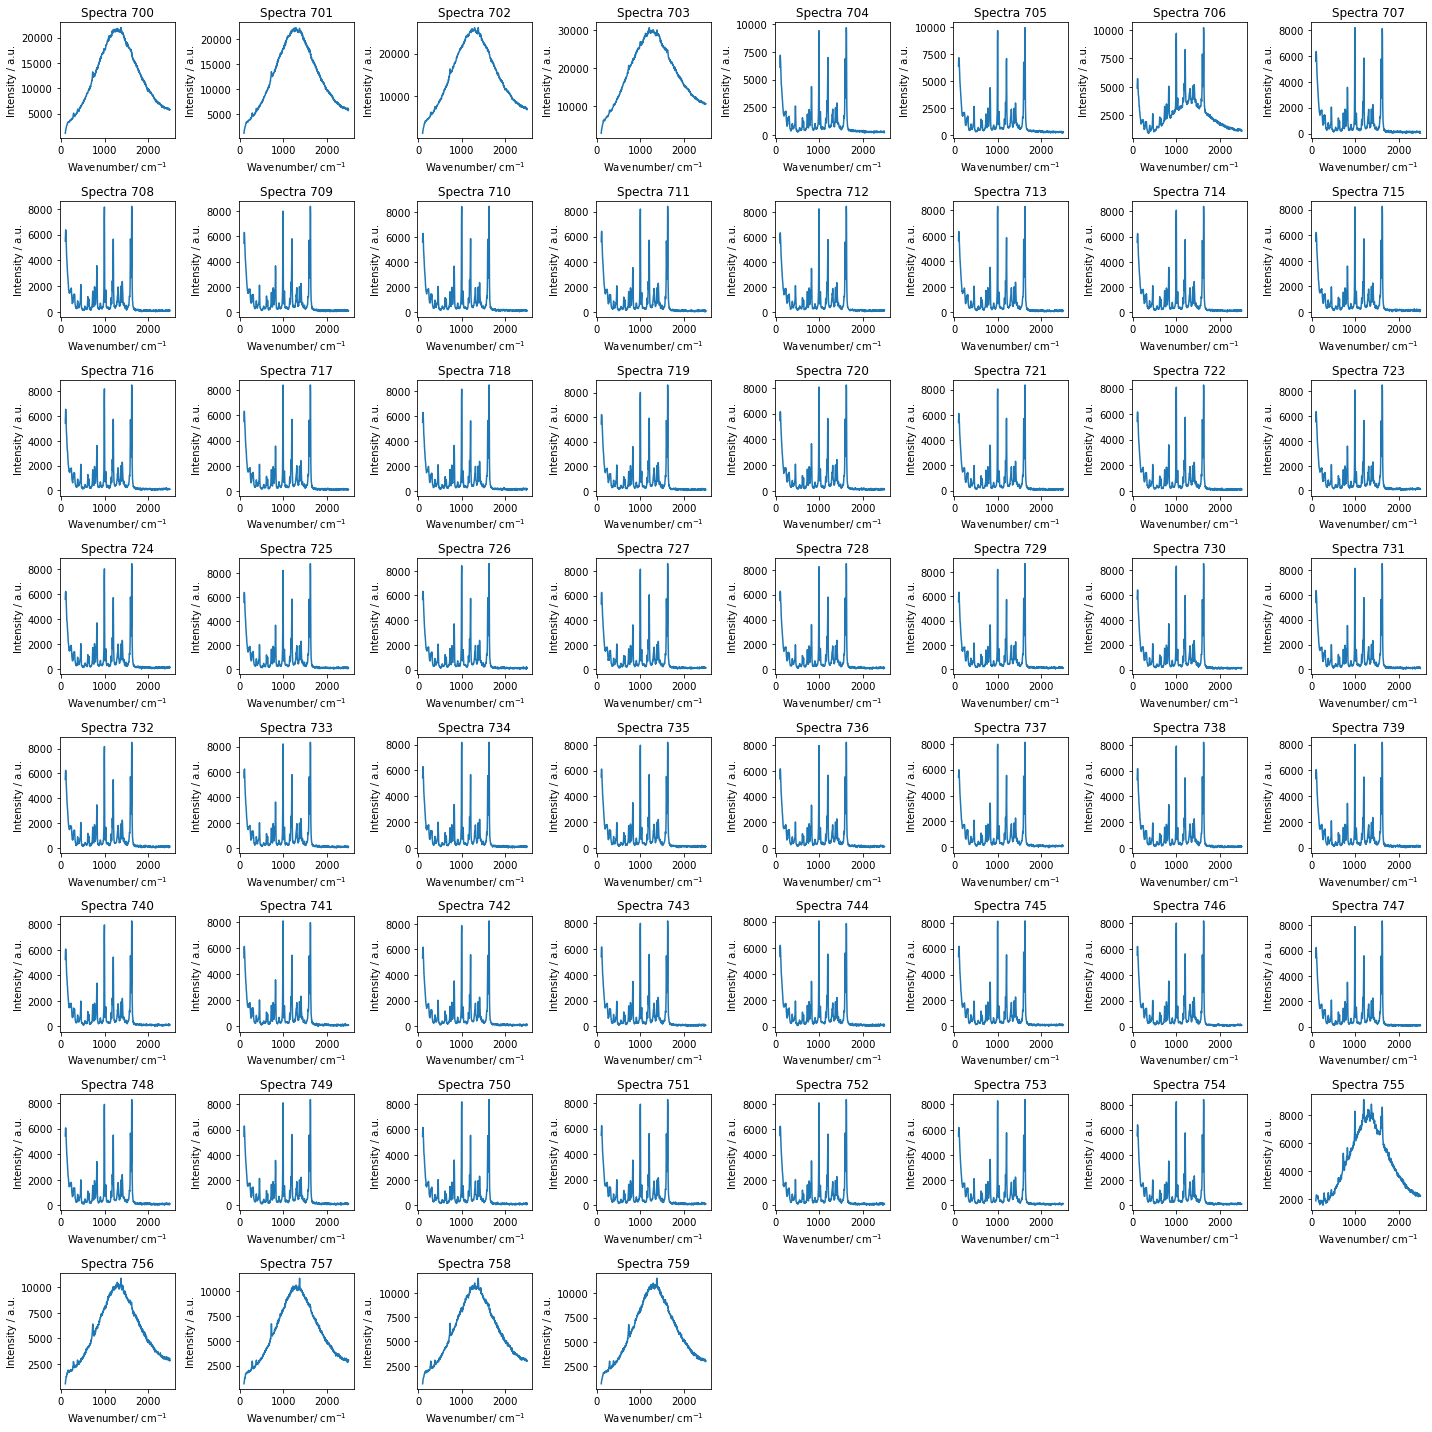

In [44]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(700, 760):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-699))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [45]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[736:750, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
736    C10_R2     5370.0      5975.0      6152.0      5974.0      5435.0   
737    C10_R2     5443.0      5807.0      5989.0      5864.0      5401.0   
738    C10_R2     5311.0      5897.0      6164.0      5867.0      5411.0   
739    C10_R2     5360.0      5939.0      6058.0      5912.0      5416.0   
740    C10_R2     5248.0      5899.0      6058.0      5846.0      5364.0   
741    C10_R2     5251.0      6016.0      6119.0      5811.0      5288.0   
742    C10_R2     5347.0      5937.0      6182.0      5928.0      5426.0   
743    C10_R2     5412.0      6074.0      6165.0      5928.0      5363.0   
744    C10_R2     5341.0      6120.0      6190.0      5918.0      5413.0   
745    C10_R2     5397.0      5998.0      6185.0      5979.0      5328.0   
746    C10_R2     5526.0      6186.0      6185.0      5801.0      5459.0   
747    C10_R2     5435.0      5955.0      6251.0      5868.0      5508.0   
748    C10_R2     5425.0      5959.0      6056.0      5873.0      5320.0   
749    C10_R2     5459.0      5998.0      6282.0      5970.0      5355.0   
750    C10_R2     5452.0      6049.0      6156.0      5861.0      5398.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
736      4945.0      4475.0      4170.0      3779.0  ...        169.0   
737      4874.0      4464.0      4204.0      3901.0  ...        103.0   
738      4825.0      4460.0      4201.0      3902.0  ...        135.0   
739      4899.0      4316.0      4124.0      3947.0  ...        124.0   
740      4964.0      4516.0      4056.0      3836.0  ...        170.0   
741      4734.0      4478.0      4031.0      3826.0  ...        117.0   
742      4933.0      4568.0      4116.0      3820.0  ...        132.0   
743      4864.0      4621.0      4066.0      3932.0  ...        125.0   
744      4886.0      4447.0      4092.0      3916.0  ...         65.0   
745      5046.0      4584.0      4190.0      3939.0  ...        130.0   
746      5002.0      4450.0      4187.0      3934.0  ...        117.0   
747      4943.0      4601.0      4232.0      3844.0  ...        147.0   
748      4986.0      4557.0      4151.0      3833.0  ...        104.0   
749      4922.0      4485.0      4193.0      3824.0  ...         91.0   
750      4986.0      4696.0      4019.0      3974.0  ...        148.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
736         88.0         96.0        101.0        103.0        170.0   
737         94.0         51.0        166.0         88.0        125.0   
738         70.0         73.0        137.0         88.0        110.0   
739        132.0        104.0        102.0         69.0        129.0   
740         55.0         54.0        190.0        105.0         98.0   
741        103.0        127.0        133.0         58.0        111.0   
742         60.0         74.0        100.0         48.0        136.0   
743         48.0        100.0        119.0         74.0        125.0   
744         94.0         41.0        176.0         11.0        182.0   
745         46.0         91.0        106.0         29.0        147.0   
746         99.0         80.0        154.0         92.0        134.0   
747         83.0         74.0        153.0         60.0        158.0   
748         87.0        102.0        118.0         20.0        160.0   
749         89.0        119.0        132.0         29.0        148.0   
750         73.0         88.0        147.0         34.0        164.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
736        148.0        129.0        134.0        119.0  
737        179.0         94.0         83.0        111.0  
738        160.0         98.0         86.0        108.0  
739        147.0         62.0        110.0         73.0  
740        145.0        114.0        154.0        102.0  
741        125.0         97.0        130.0        101.0  
742        181.0         73.0         91.0        102.0  
7

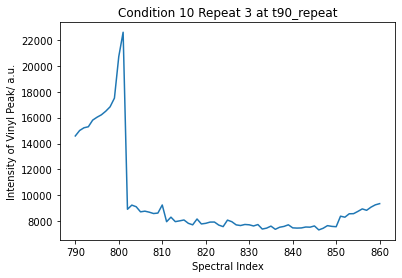

In [46]:
# Condition
df.loc[790:860,'1629.051381'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t90_repeat')
plt.show()

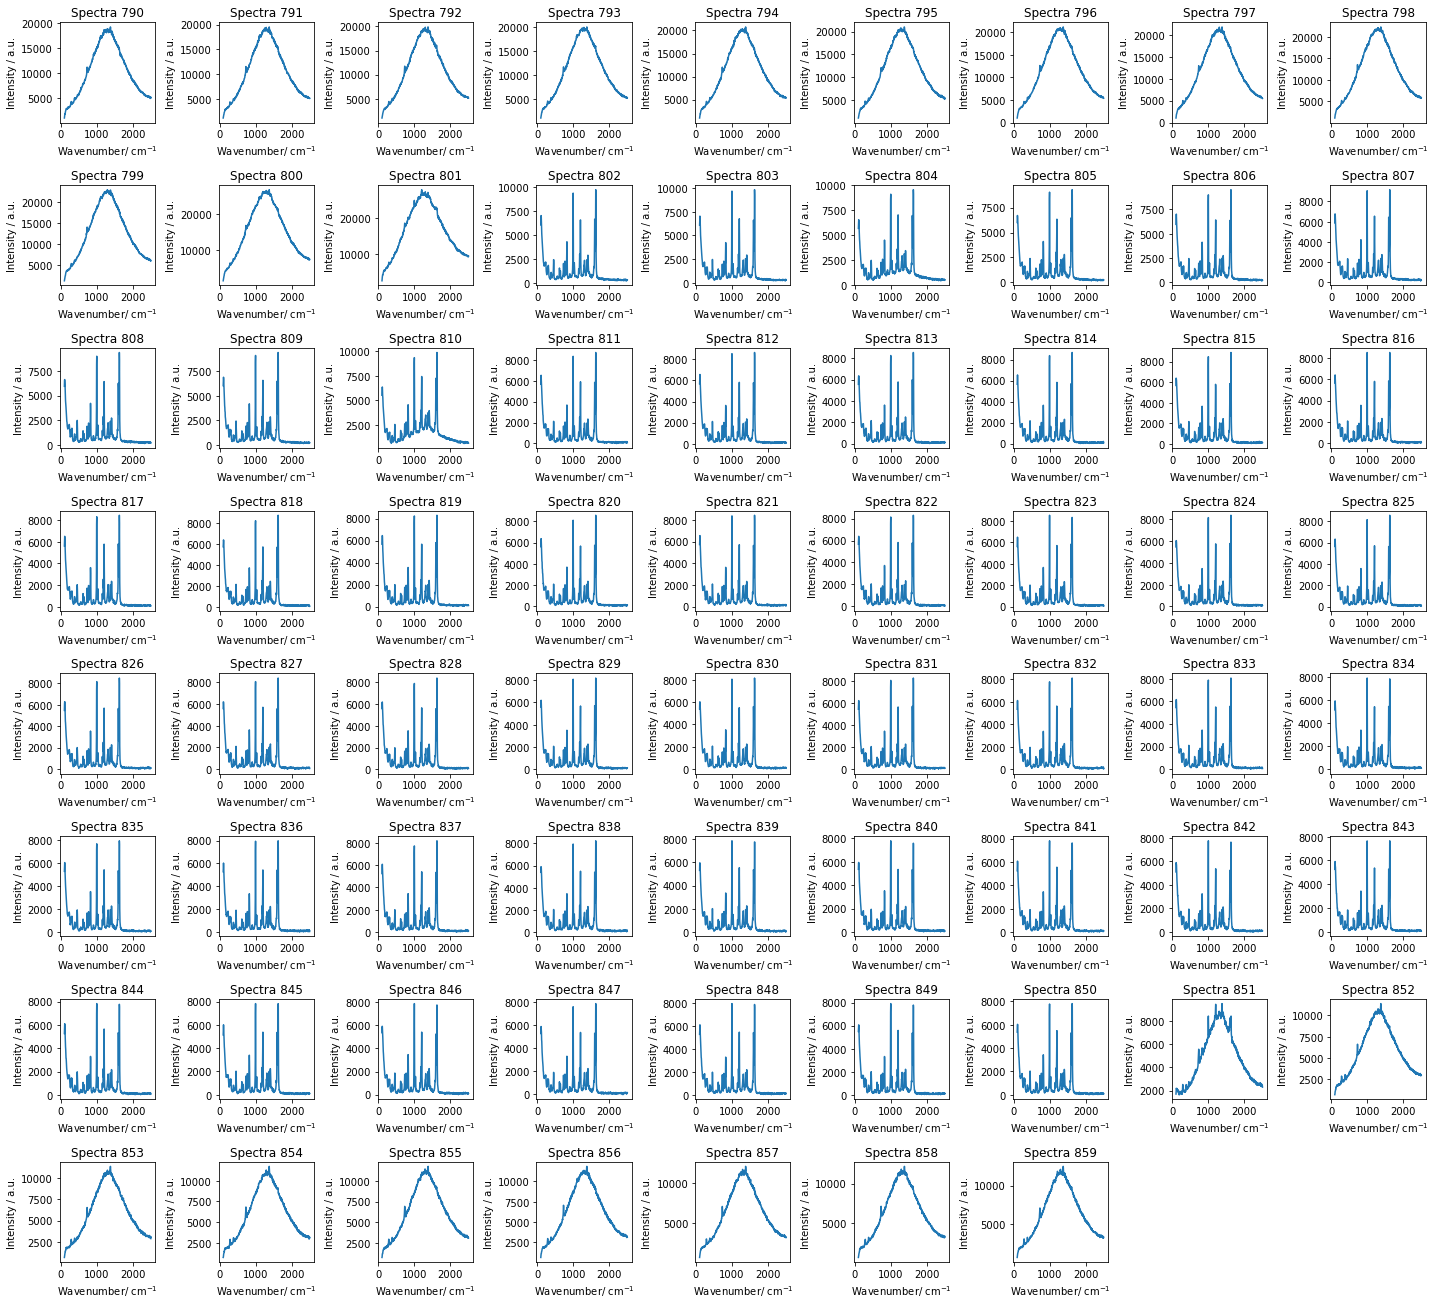

In [47]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(790, 860):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(9,9,(i-789))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [48]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[834:848, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
834    C10_R3     5177.0      5732.0      5948.0      5671.0      5312.0   
835    C10_R3     5290.0      5834.0      6051.0      5695.0      5222.0   
836    C10_R3     5278.0      5767.0      6037.0      5738.0      5214.0   
837    C10_R3     5247.0      5826.0      6082.0      5767.0      5368.0   
838    C10_R3     5393.0      5870.0      5904.0      5782.0      5454.0   
839    C10_R3     5308.0      5948.0      5946.0      5762.0      5204.0   
840    C10_R3     5353.0      5880.0      5935.0      5859.0      5189.0   
841    C10_R3     5256.0      5804.0      6077.0      5875.0      5228.0   
842    C10_R3     5100.0      5890.0      5751.0      5687.0      5119.0   
843    C10_R3     5254.0      5748.0      5912.0      5537.0      5439.0   
844    C10_R3     5260.0      5857.0      6093.0      5844.0      5380.0   
845    C10_R3     5133.0      5776.0      5999.0      5702.0      5302.0   
846    C10_R3     5367.0      5914.0      5920.0      5618.0      5185.0   
847    C10_R3     5288.0      5765.0      5891.0      5676.0      5371.0   
848    C10_R3     5289.0      5911.0      6119.0      5743.0      5308.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
834      4967.0      4411.0      4164.0      3653.0  ...        143.0   
835      4833.0      4313.0      4079.0      3882.0  ...        138.0   
836      4940.0      4422.0      4217.0      3806.0  ...        116.0   
837      4925.0      4572.0      4088.0      3947.0  ...        157.0   
838      5007.0      4464.0      4080.0      3756.0  ...        136.0   
839      4956.0      4436.0      4070.0      3769.0  ...        154.0   
840      4845.0      4309.0      4029.0      3729.0  ...        144.0   
841      4832.0      4453.0      4102.0      3813.0  ...        143.0   
842      4828.0      4349.0      4131.0      3830.0  ...        142.0   
843      4828.0      4500.0      4028.0      3775.0  ...        138.0   
844      4895.0      4416.0      4121.0      3916.0  ...        153.0   
845      4909.0      4466.0      4119.0      3936.0  ...         89.0   
846      4933.0      4438.0      4137.0      3724.0  ...        140.0   
847      4751.0      4592.0      4038.0      3698.0  ...        130.0   
848      4786.0      4466.0      4099.0      3827.0  ...        107.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
834        100.0        141.0        135.0         73.0        145.0   
835         48.0         72.0        133.0         15.0        111.0   
836         91.0        125.0        168.0         44.0        161.0   
837         86.0         78.0        164.0         45.0        158.0   
838         44.0         60.0        100.0         23.0        167.0   
839         92.0         80.0        156.0         43.0        121.0   
840         78.0         19.0        127.0         74.0        113.0   
841        101.0         67.0         97.0         59.0        133.0   
842        101.0         88.0        149.0         61.0        135.0   
843         91.0         86.0        121.0         46.0        138.0   
844        113.0         91.0        110.0         42.0        165.0   
845         59.0         95.0        129.0         53.0        151.0   
846        118.0         51.0        173.0         57.0        135.0   
847         64.0         47.0        123.0         53.0        137.0   
848         37.0        120.0        158.0         56.0        145.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
834        154.0         90.0        108.0         84.0  
835        109.0        134.0        126.0         68.0  
836        132.0        109.0        147.0         47.0  
837        148.0         96.0         99.0        108.0  
838        134.0         43.0        152.0         67.0  
839        157.0        130.0         85.0         68.0  
840        139.0        122.0         81.0         72.0  
8

In [49]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
56      C1_R1     5652.0      6287.0      6609.0      6198.0      5625.0   
57      C1_R1     5794.0      6237.0      6446.0      6108.0      5468.0   
58      C1_R1     5706.0      6378.0      6434.0      6184.0      5662.0   
59      C1_R1     5780.0      6258.0      6295.0      6200.0      5488.0   
60      C1_R1     5772.0      6323.0      6501.0      6145.0      5457.0   
..        ...        ...         ...         ...         ...         ...   
844    C10_R3     5260.0      5857.0      6093.0      5844.0      5380.0   
845    C10_R3     5133.0      5776.0      5999.0      5702.0      5302.0   
846    C10_R3     5367.0      5914.0      5920.0      5618.0      5185.0   
847    C10_R3     5288.0      5765.0      5891.0      5676.0      5371.0   
848    C10_R3     5289.0      5911.0      6119.0      5743.0      5308.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
56       5204.0      4524.0      4190.0      3888.0  ...        181.0   
57       4953.0      4518.0      4199.0      3856.0  ...        230.0   
58       4950.0      4595.0      4069.0      3895.0  ...        105.0   
59       4996.0      4597.0      4145.0      3897.0  ...        194.0   
60       5000.0      4480.0      4154.0      3932.0  ...        169.0   
..          ...         ...         ...         ...  ...          ...   
844      4895.0      4416.0      4121.0      3916.0  ...        153.0   
845      4909.0      4466.0      4119.0      3936.0  ...         89.0   
846      4933.0      4438.0      4137.0      3724.0  ...        140.0   
847      4751.0      4592.0      4038.0      3698.0  ...        130.0   
848      4786.0      4466.0      4099.0      3827.0  ...        107.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
56         120.0        131.0        145.0        115.0        218.0   
57         110.0        126.0        206.0        102.0        179.0   
58         142.0        144.0        170.0        142.0        187.0   
59         146.0        131.0        227.0        118.0        202.0   
60         119.0        134.0        210.0         86.0        140.0   
..           ...          ...          ...          ...          ...   
844        113.0         91.0        110.0         42.0        165.0   
845         59.0         95.0        129.0         53.0        151.0   
846        118.0         51.0        173.0         57.0        135.0   
847         64.0         47.0        123.0         53.0        137.0   
848         37.0        120.0        158.0         56.0        145.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
56         261.0        120.0        150.0        147.0  
57         221.0        121.0        179.0        137.0  
58         197.0        178.0        167.0        128.0  
59         182.0        118.0        167.0        182.0  
60         195.0         98.0        158.0        148.0  
..           ...          ...          ...          ...  
844        173.0        143.0        104.0         77.0  
845        125.0        146.0         84.0         91.0  
846        136.0        108.0        111.0         98.0  
847        177.0         79.0        120.0        134.0  
848        120.0        105.0         78.0        117.0  

[135 rows x 638 columns]

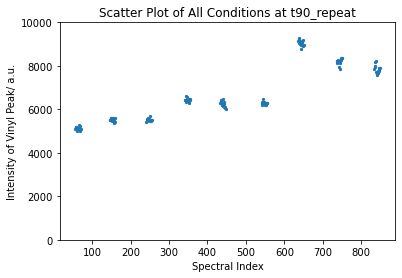

In [52]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t90_repeat')
plt.ylim(0, 10000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [53]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [54]:
# Inspect df_.
df_

Condition  99.051832  103.563047  108.072082  112.576815  117.079374  \
56      C1_R1     5652.0      6287.0      6609.0      6198.0      5625.0   
57      C1_R1     5794.0      6237.0      6446.0      6108.0      5468.0   
58      C1_R1     5706.0      6378.0      6434.0      6184.0      5662.0   
59      C1_R1     5780.0      6258.0      6295.0      6200.0      5488.0   
60      C1_R1     5772.0      6323.0      6501.0      6145.0      5457.0   
..        ...        ...         ...         ...         ...         ...   
844    C10_R3     5260.0      5857.0      6093.0      5844.0      5380.0   
845    C10_R3     5133.0      5776.0      5999.0      5702.0      5302.0   
846    C10_R3     5367.0      5914.0      5920.0      5618.0      5185.0   
847    C10_R3     5288.0      5765.0      5891.0      5676.0      5371.0   
848    C10_R3     5289.0      5911.0      6119.0      5743.0      5308.0   

     121.579759  126.075853  130.567658  135.061538  ...  2472.877365  \
56       5204.0      4524.0      4190.0      3888.0  ...        181.0   
57       4953.0      4518.0      4199.0      3856.0  ...        230.0   
58       4950.0      4595.0      4069.0      3895.0  ...        105.0   
59       4996.0      4597.0      4145.0      3897.0  ...        194.0   
60       5000.0      4480.0      4154.0      3932.0  ...        169.0   
..          ...         ...         ...         ...  ...          ...   
844      4895.0      4416.0      4121.0      3916.0  ...        153.0   
845      4909.0      4466.0      4119.0      3936.0  ...         89.0   
846      4933.0      4438.0      4137.0      3724.0  ...        140.0   
847      4751.0      4592.0      4038.0      3698.0  ...        130.0   
848      4786.0      4466.0      4099.0      3827.0  ...        107.0   

     2476.040621  2479.201030  2482.361832  2485.521408  2488.678140  \
56         120.0        131.0        145.0        115.0        218.0   
57         110.0        126.0        206.0        102.0        179.0   
58         142.0        144.0        170.0        142.0        187.0   
59         146.0        131.0        227.0        118.0        202.0   
60         119.0        134.0        210.0         86.0        140.0   
..           ...          ...          ...          ...          ...   
844        113.0         91.0        110.0         42.0        165.0   
845         59.0         95.0        129.0         53.0        151.0   
846        118.0         51.0        173.0         57.0        135.0   
847         64.0         47.0        123.0         53.0        137.0   
848         37.0        120.0        158.0         56.0        145.0   

     2491.835266  2494.989551  2498.139382  2501.291225  
56         261.0        120.0        150.0        147.0  
57         221.0        121.0        179.0        137.0  
58         197.0        178.0        167.0        128.0  
59         182.0        118.0        167.0        182.0  
60         195.0         98.0        158.0        148.0  
..           ...          ...          ...          ...  
844        173.0        143.0        104.0         77.0  
845        125.0        146.0         84.0         91.0  
846        136.0        108.0        111.0         98.0  
847        177.0         79.0        120.0        134.0  
848        120.0        105.0         78.0        117.0  

[135 rows x 638 columns]

In [55]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.051381']].groupby('Condition').describe()

1629.051381                                                   \
                count         mean         std     min     25%     50%   
Condition                                                                
C10_R1           15.0  8441.933333  121.176062  8205.0  8379.5  8462.0   
C10_R2           15.0  7610.600000   94.406265  7425.0  7559.5  7610.0   
C10_R3           15.0  7533.266667  107.181733  7333.0  7472.5  7540.0   
C19_R1           15.0  6126.266667   88.393977  5918.0  6089.0  6133.0   
C19_R2           15.0  5942.400000   78.094997  5738.0  5908.0  5953.0   
C19_R3           15.0  5983.466667   89.364316  5860.0  5930.0  5945.0   
C1_R1            15.0  5055.600000   88.997432  4915.0  5003.5  5035.0   
C1_R2            15.0  5384.800000   98.241830  5251.0  5309.0  5351.0   
C1_R3            15.0  5285.066667   76.033326  5160.0  5233.0  5262.0   

                           
              75%     max  
Condition                  
C10_R1     8513.0  8647.0  
C10_R2     7648.0  7799.0  
C10_R3     7615.0  7728.0  
C19_R1     6195.0  6241.0  
C19_R2     6001.5  6051.0  
C19_R3     6037.5  6173.0  
C1_R1      5120.0  5213.0  
C1_R2      5458.5  5554.0  
C1_R3      5337.0  5445.0

In [56]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t90_repeat.csv')